## Course Project - 01: Data Preprocessing, EDA and Regression Analysis
### Dataset3: CDC Dataset
### Submitted By: T15-Gnosis

- Bhavan Bhatt(202311021)
- Pratham Patel(202311022)
- Harshneel Soni(202311024)
- Nishit Munjani(202311026)
- Rohit Rathod(202311039)

In [463]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [464]:
df = pd.read_csv("data.csv")

In [465]:
df.head(5)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [466]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

In [467]:
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [468]:
print("Unique Topics", df['Topic'].unique())
print("Unique Class", df['Class'].unique())
print("Unique Question on different Topics", df['Question'].unique())

Unique Topics ['Obesity / Weight Status' 'Fruits and Vegetables - Behavior'
 'Physical Activity - Behavior']
Unique Class ['Obesity / Weight Status' 'Fruits and Vegetables' 'Physical Activity']
Unique Question on different Topics ['Percent of adults aged 18 years and older who have obesity'
 'Percent of adults aged 18 years and older who have an overweight classification'
 'Percent of adults who report consuming fruit less than one time daily'
 'Percent of adults who report consuming vegetables less than one time daily'
 'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week'
 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'
 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and e

**Introduction to the data and problem we are trying to solve:**

The dataset we have is Nutrition, Physical Activity, and Obesity - Behavioral Risk Factor Surveillance System provided by Centers for Diseass control and prevention(CDC).This dataset includes data on adult's diet, physical activity, and weight status from Behavioral Risk Factor Surveillance System. This data is used for DNPAO's Data, Trends, and Maps database, which provides national and state specific data on obesity, nutrition, and physical activity. [Here](https://www.kaggle.com/datasets/spittman1248/cdc-data-nutrition-physical-activity-obesity) is the reference link to the same.

It covers mainly 3 topics:

1. Obesity
2. Fruits and Vegetables
3. Physical Activity

Out of these looking at the current trends we are focusing on the Obesity, which covers two questions, "Percent of adults aged 18 years and older who have obesity" & "Percent of adults aged 18 years and older who have an overweight classification". We will be treating this as our primary problem to solve.

**Let us have a look on the meaning of data columns:**

**Data\_Value** is the percent of people who are obese/overweight depending on the question out of the given **Sample\_Size** for any state out of the 50 states of USA. That **Sample\_Size** further gets classified into one of the 5 classifiers: **Age (years), Gender, Education, Income and Race/Ethnicity**. Regarding what features we are looking for in the Stratification ID change accordingly. Another Important feature to look out for is Low\_Confidence\_Limit and High\_Confidence\_Limit. As per this [Glossary](https://nccd.cdc.gov/GTSSDataSurveyResources/HelpHtml/glossary.htm) provided by CDC, they belong to the range of 95% Confidence Interval(CI).

In statistics, a **confidence interval (CI)** is a type of estimate computed from the statistics of the observed data. This proposes a range of plausible values for an unknown parameter. The interval has an associated confidence level that the true parameter is in the proposed range. This is more clearly stated as: the confidence level represents the probability that the unknown parameter lies in the stated interval. The level of confidence can be chosen by the investigator. In general terms, a confidence interval for an unknown parameter is based on sampling the distribution of a corresponding estimator.

In this case, as it is 95% Confidence Level, out of the 100 people we randomly ask these questions 95 of them would have the true value in the given range. It is a statistical measure and one shouldn't use this as a user parameter because we are unaware about the measures of central tendency of the population. Including this features will reduce in some type of Data leak and the error rate will be very slow as showed in the last part of this report(Appendix:A)

<Axes: >

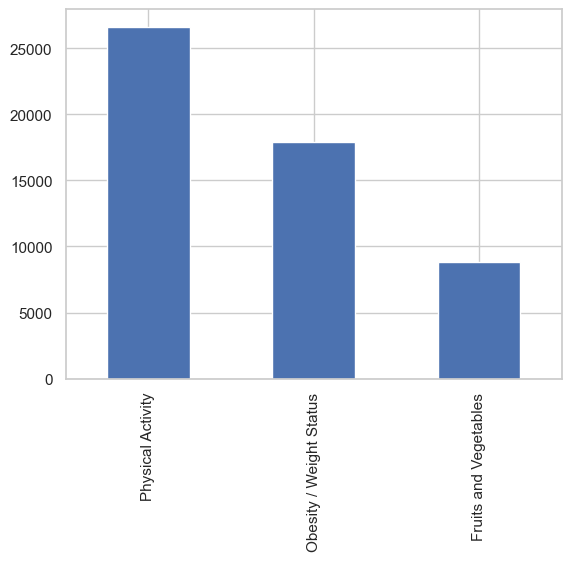

In [469]:
df['Class'].value_counts().plot(kind = 'bar')

In [470]:
df = df[df['Topic'] == 'Obesity / Weight Status']

In [471]:
print(df['Age(years)'].unique())
print(df['Income'].unique())
print(df['Education'].unique())
print(df['Gender'].unique())
print(df['Race/Ethnicity'].unique())

[nan '18 - 24' '25 - 34' '35 - 44' '45 - 54' '55 - 64' '65 or older']
[nan 'Less than $15,000' '$15,000 - $24,999' '$25,000 - $34,999'
 '$35,000 - $49,999' '$50,000 - $74,999' '$75,000 or greater'
 'Data not reported']
[nan 'Less than high school' 'High school graduate'
 'Some college or technical school' 'College graduate']
[nan 'Male' 'Female']
[nan 'Non-Hispanic White' 'Non-Hispanic Black' 'Hispanic' 'Asian'
 'Hawaiian/Pacific Islander' 'American Indian/Alaska Native'
 '2 or more races' 'Other']


## EDA

In [472]:
print(df['Datasource'].unique())
print(df['Data_Value_Unit'].unique())
print(df['Data_Value_Type'].unique())
print(df['Data_Value_Footnote_Symbol'].unique())
print(df['Data_Value_Footnote'].unique())

['Behavioral Risk Factor Surveillance System']
[nan]
['Value']
[nan '~']
[nan 'Data not available because sample size is insufficient.'
 'Data not available because sample size is insufficient.  If data only missing for the confidence interval, the confidence interval was not calculated.']


In [473]:
df.isnull().sum()

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Unit               17920
Data_Value_Type                   0
Data_Value                     1666
Data_Value_Alt                 1666
Data_Value_Footnote_Symbol    16254
Data_Value_Footnote           16254
Low_Confidence_Limit           1666
High_Confidence_Limit          1666
Sample_Size                    1666
Total                         17280
Age(years)                    14080
Education                     15360
Gender                        16640
Income                        13440
Race/Ethnicity                12800
GeoLocation                     336
ClassID                           0
TopicID                           0
QuestionID                        0
DataValueTypeID             

### Removing all the columns which will not be helpful in prediction

In [474]:
df = df[['YearStart','LocationAbbr', 'LocationDesc','Data_Value','Sample_Size', 
       'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation']]

In [475]:
df.head()

,YearStart,LocationAbbr,LocationDesc,Data_Value,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation
0,2011,AL,Alabama,32.0,7304.0,Total,NaN,NaN,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)"
1,2011,AL,Alabama,32.3,2581.0,NaN,NaN,NaN,Male,NaN,NaN,"(32.84057112200048, -86.63186076199969)"
2,2011,AL,Alabama,31.8,4723.0,NaN,NaN,NaN,Female,NaN,NaN,"(32.84057112200048, -86.63186076199969)"
3,2011,AL,Alabama,33.6,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)"
4,2011,AL,Alabama,32.8,2402.0,NaN,NaN,High school graduate,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)"


In [476]:
df.shape

(17920, 12)

In [477]:
df.isnull().sum()

YearStart             0
LocationAbbr          0
LocationDesc          0
Data_Value         1666
Sample_Size        1666
Total             17280
Age(years)        14080
Education         15360
Gender            16640
Income            13440
Race/Ethnicity    12800
GeoLocation         336
dtype: int64

As there are 1666 rows which has Sample_Size as null and for that values since we don't have any Sample_Size we will not have any of the features. Also this represents the 10% of the total values so there will not be any information loss.

In [478]:
df = df.dropna(subset=['Sample_Size'])

In [479]:
df.isnull().sum()

YearStart             0
LocationAbbr          0
LocationDesc          0
Data_Value            0
Sample_Size           0
Total             15614
Age(years)        12414
Education         13694
Gender            14974
Income            11774
Race/Ethnicity    12800
GeoLocation         336
dtype: int64

## Calculating the IQR Range and filtering the outliers

count    16254.000000
mean        31.927925
std          6.627183
min          0.900000
25%         28.200000
50%         32.800000
75%         36.500000
max         60.400000
Name: Data_Value, dtype: float64
Upper Band:  48.95
Lower Band:  15.749999999999998


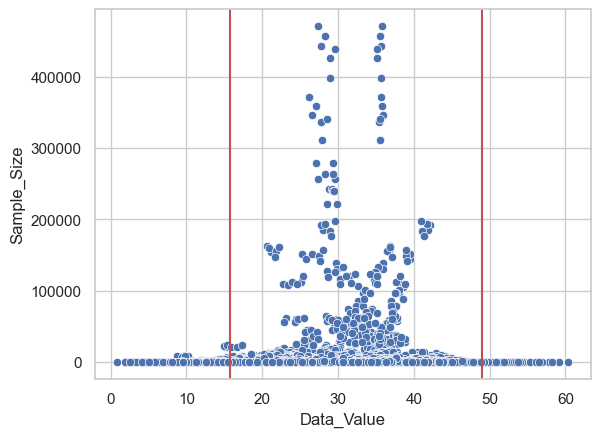

In [480]:
print(df['Data_Value'].describe())
sns.scatterplot(x=df['Data_Value'], y=df['Sample_Size'])

# Getting IQR Range
q1 = np.percentile(df['Data_Value'], 25, method='midpoint')
q3 = np.percentile(df['Data_Value'], 75, method='midpoint')
IQR = q3 - q1
upper = q3 + 1.5 * IQR
lower = q1 - 1.5 * IQR
print('Upper Band: ', upper)
print('Lower Band: ', lower)

plt.axvline(x=upper, color='r')
plt.axvline(x=lower, color='r')
df = df[(df['Data_Value'] <= upper) & (df['Data_Value'] >= lower)]

## Now that we have a bit of clean data let us explore the relationships between features

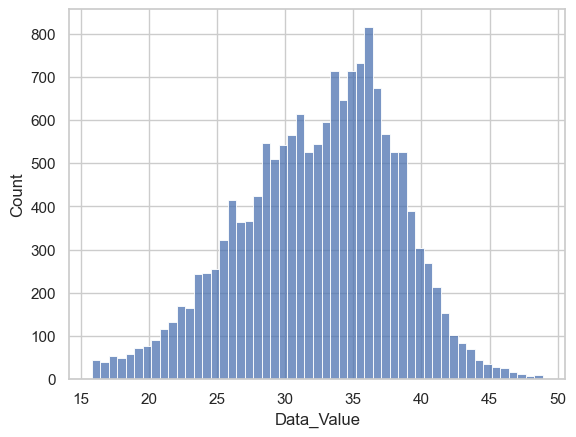

In [481]:
ax=sns.histplot(df,x= 'Data_Value')

### Upon observing above graph it is certain that Data_Value follows a bit of normal distribution

(0.0, 10000.0, 0.0, 500.0)

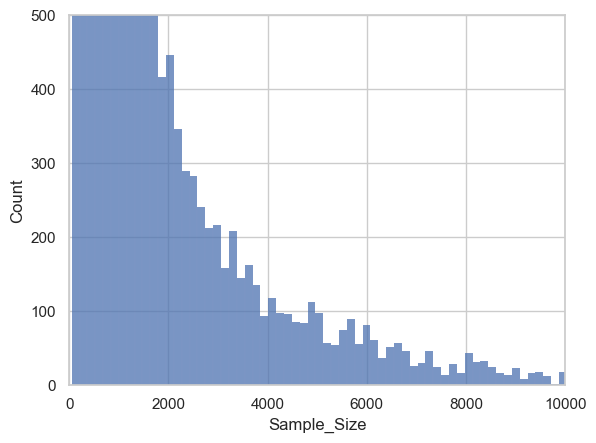

In [482]:
ax=sns.histplot(df,x= 'Sample_Size')
plt.axis([0,10000,0, 500])

### A little bit of restructuring is needed, we can infere that Sample Size is distributed over a very long range but the frequency of Low Sample Sizes is very obvious from looking at this distribution

(0.0, 4000.0, 0.0, 500.0)

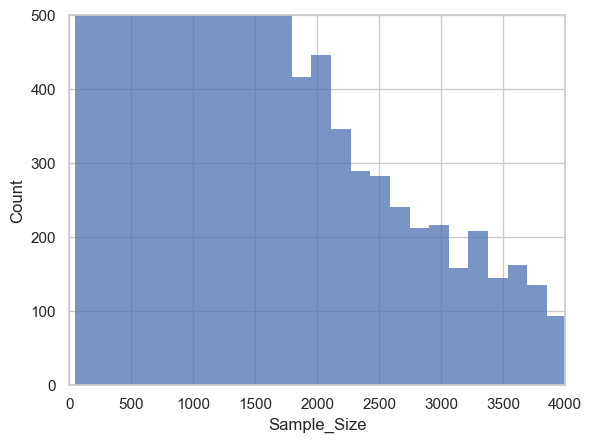

In [483]:
ax=sns.histplot(df,x= 'Sample_Size')
plt.axis([0,4000,0, 500])

(2010.0, 2020.0, 0.0, 3500.0)

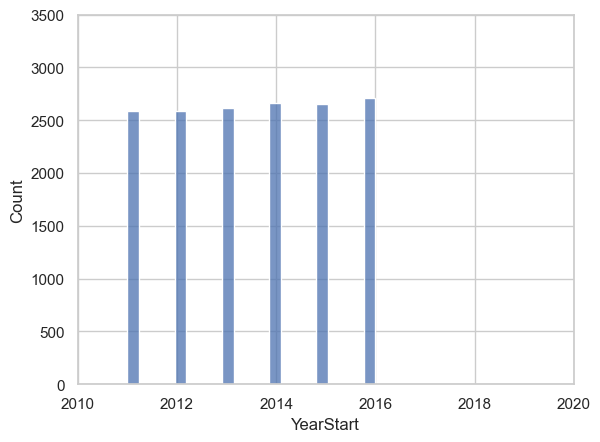

In [484]:
sns.histplot(df,x="YearStart")
plt.axis([2010,2020,0,3500])

### Observation: Almost all years have same frequency counts, but it is seen before that year 2014 mostly contains data of all the states

### We tried to plot the 10 most and least Obese States in US for the year 2014 and compared it with the national mean obesity rate for that year

/var/folders/_8/xfc42_6120n2mkkw2ymrm37r0000gn/T/ipykernel_86483/2781845750.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



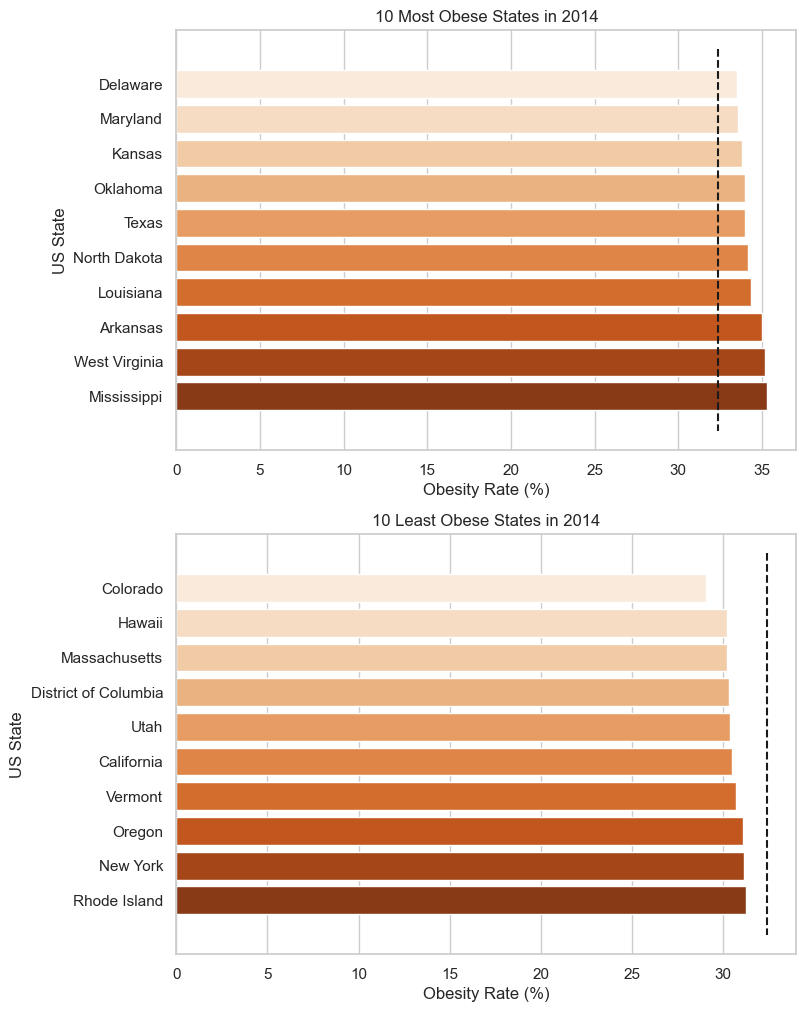

In [485]:
sorted_df=df[df['YearStart']==2014]
sorted_df = sorted_df.sort_values(['LocationDesc'], ascending = [True])
sorted_df=sorted_df[['LocationAbbr','LocationDesc','Data_Value','Gender']]
sorted_df = sorted_df.groupby('LocationDesc', as_index=False).mean()

natmeanobesity2014=sum(df['Data_Value'])/len(df)
sorted_df = sorted_df.sort_values(['Data_Value'], ascending = [True])

plt.figure(figsize = (8,12))

plt.subplot(2,1,1)
ax=sns.barplot(y=sorted_df.tail(10).LocationDesc,x=sorted_df.tail(10).Data_Value,palette="Oranges")
ax.set_ylabel('US State')
ax.set_xlabel('Obesity Rate (%)')
ax.set_title('10 Most Obese States in 2014')

plt.plot([natmeanobesity2014,natmeanobesity2014],[-1,10], '--',color = 'k')

plt.subplot(2,1,2)
ax=sns.barplot(y=sorted_df.head(10).LocationDesc,x=sorted_df.head(10).Data_Value,palette="Oranges")
ax.set_ylabel('US State')
ax.set_xlabel('Obesity Rate (%)')
ax.set_title('10 Least Obese States in 2014')

plt.plot([natmeanobesity2014,natmeanobesity2014],[-1,10], '--',color = 'k')

Text(0.5, 1.0, 'Box Plot of Data_Value vs. Education')

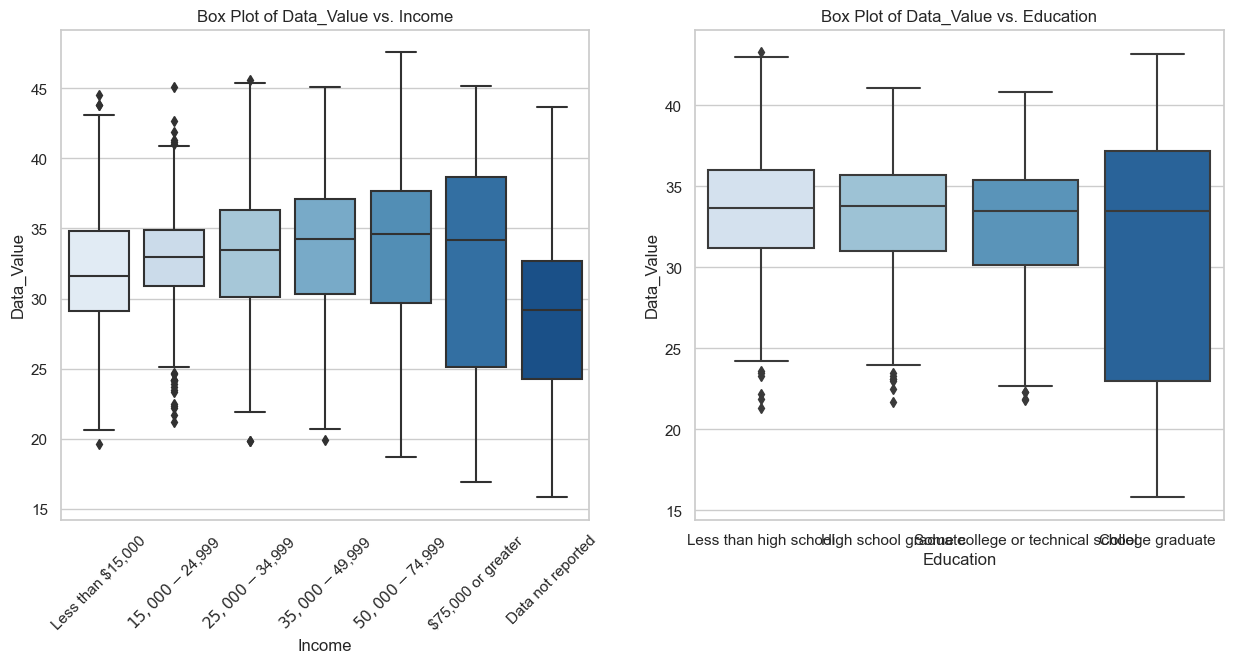

In [486]:
plt.figure(figsize = (15,14))
plt.subplot(2,2,1)
sns.boxplot(df,x= 'Income', y='Data_Value', palette='Blues')
plt.title('Box Plot of Data_Value vs. Income')
plt.xticks(rotation=45)
plt.subplot(2,2,2)
sns.boxplot(df,x= 'Education', y='Data_Value', palette='Blues')
plt.title('Box Plot of Data_Value vs. Education')

### Box-plots of Income vs Data_Value and Education vs Data_Value gives us an overall idea of the distribution, it can be noted from the above graphs that in different income sectors usually the median is very near to one another denoting that variation is very less but actually there are a couple of outliers in the same which will prove otherwise.

### Same thing can be noted for education mostly median is same but Less than High School and High School have some outliers which will skew the data a bit.

Text(0.5, 1.0, 'Box Plot of Data_Value vs. Race/Ethnicity')

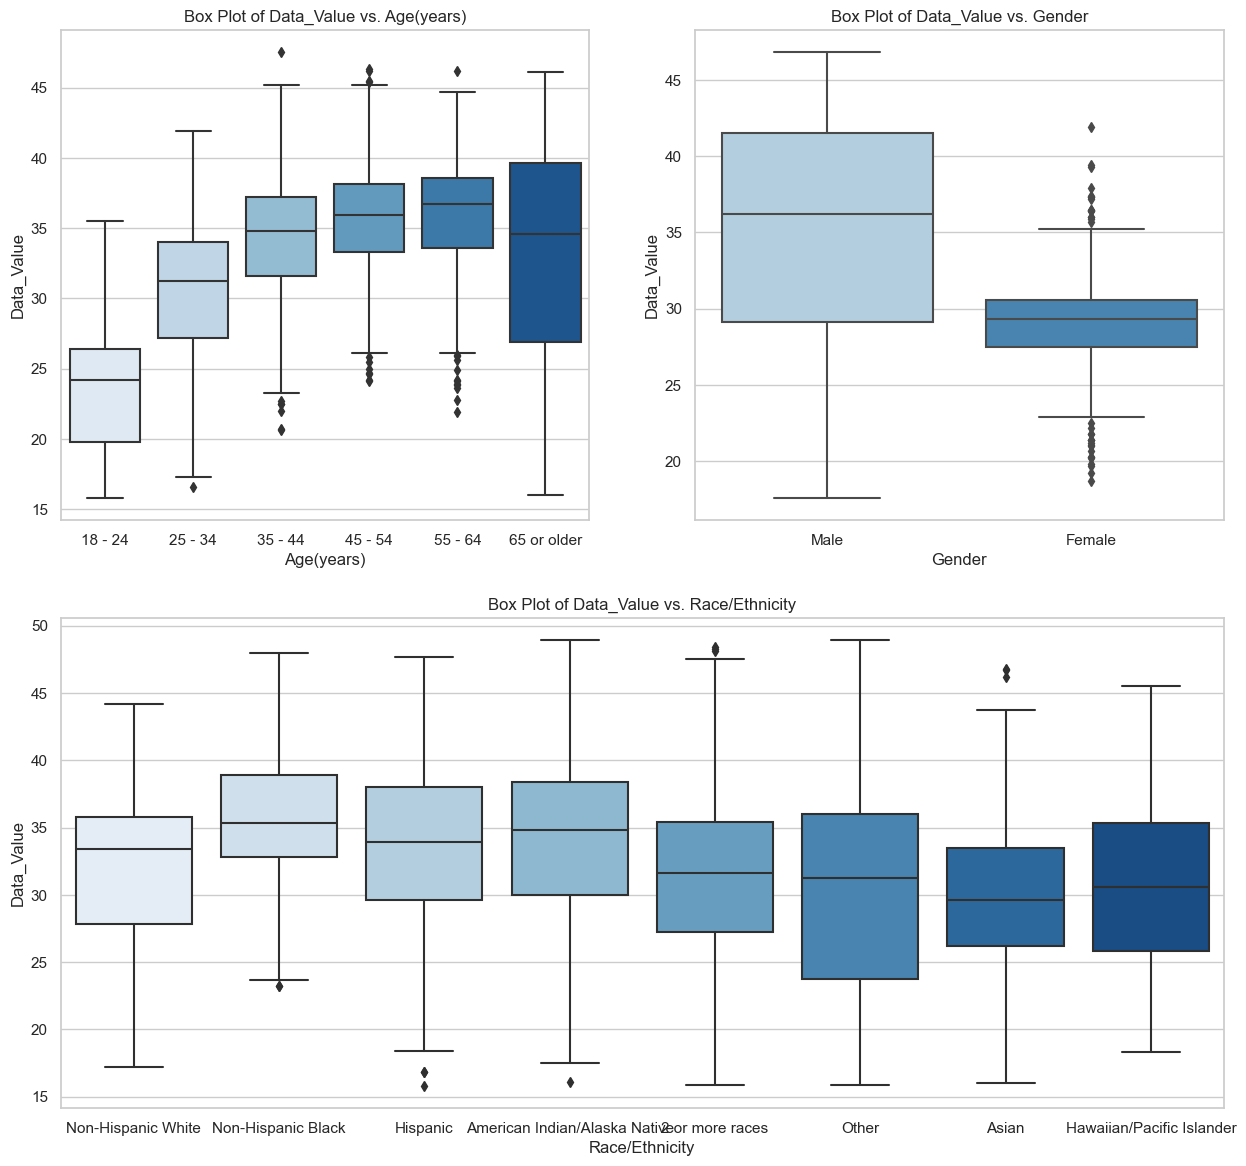

In [487]:
plt.figure(figsize = (15,14))
plt.subplot(2,2,1)
sns.boxplot(df,x= 'Age(years)', y='Data_Value', palette='Blues')
plt.title('Box Plot of Data_Value vs. Age(years)')
plt.subplot(2,2,2)
sns.boxplot(df,x= 'Gender', y='Data_Value', palette='Blues')
plt.title('Box Plot of Data_Value vs. Gender')
plt.subplot(2,1,2)
sns.boxplot(df,x='Race/Ethnicity', y='Data_Value', palette='Blues')
plt.title('Box Plot of Data_Value vs. Race/Ethnicity')

## Observation 1: Median of Males is significantly higher than that of Females.
## Observation 2: In young people the median obesity rate is very low compared to that of older people

<Axes: xlabel='Education', ylabel='Data_Value'>

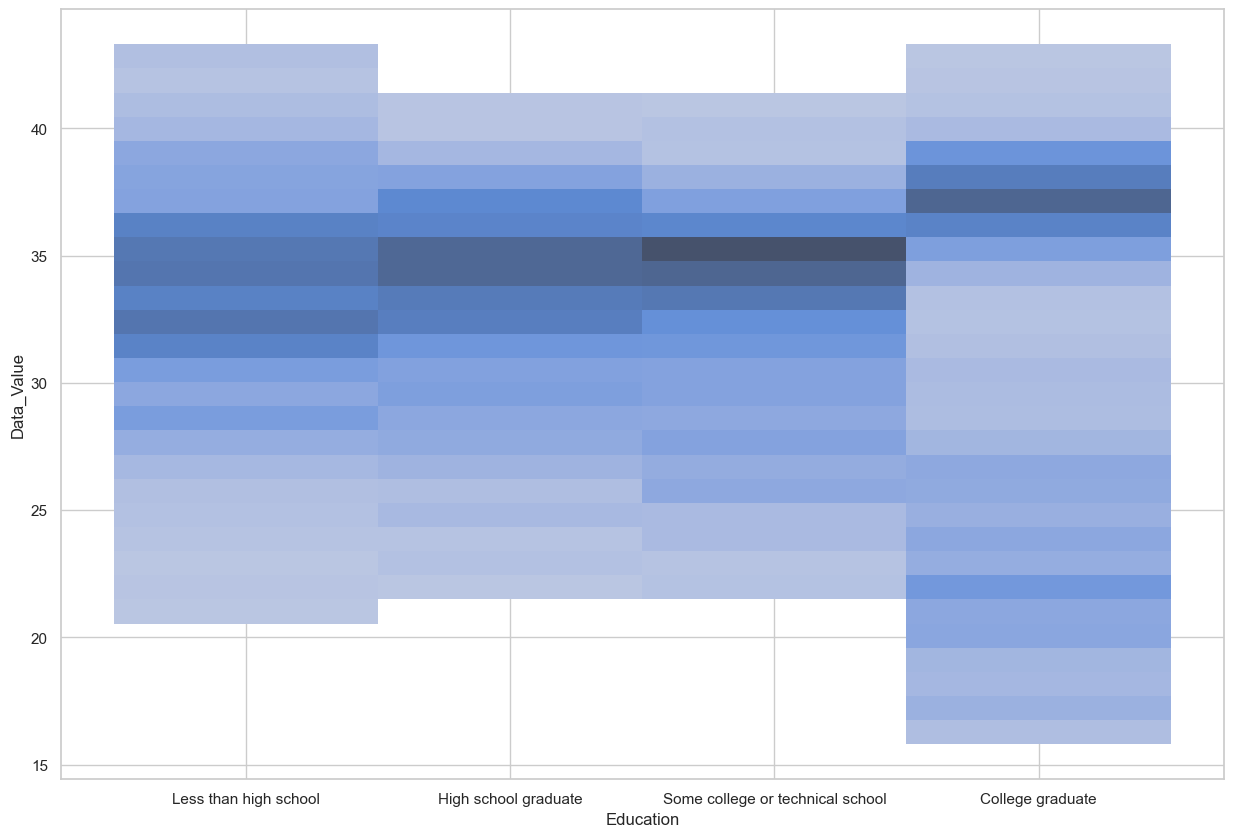

In [488]:
plt.figure(figsize=(15,10))
sns.histplot(x=df["Education"], y=df["Data_Value"],)

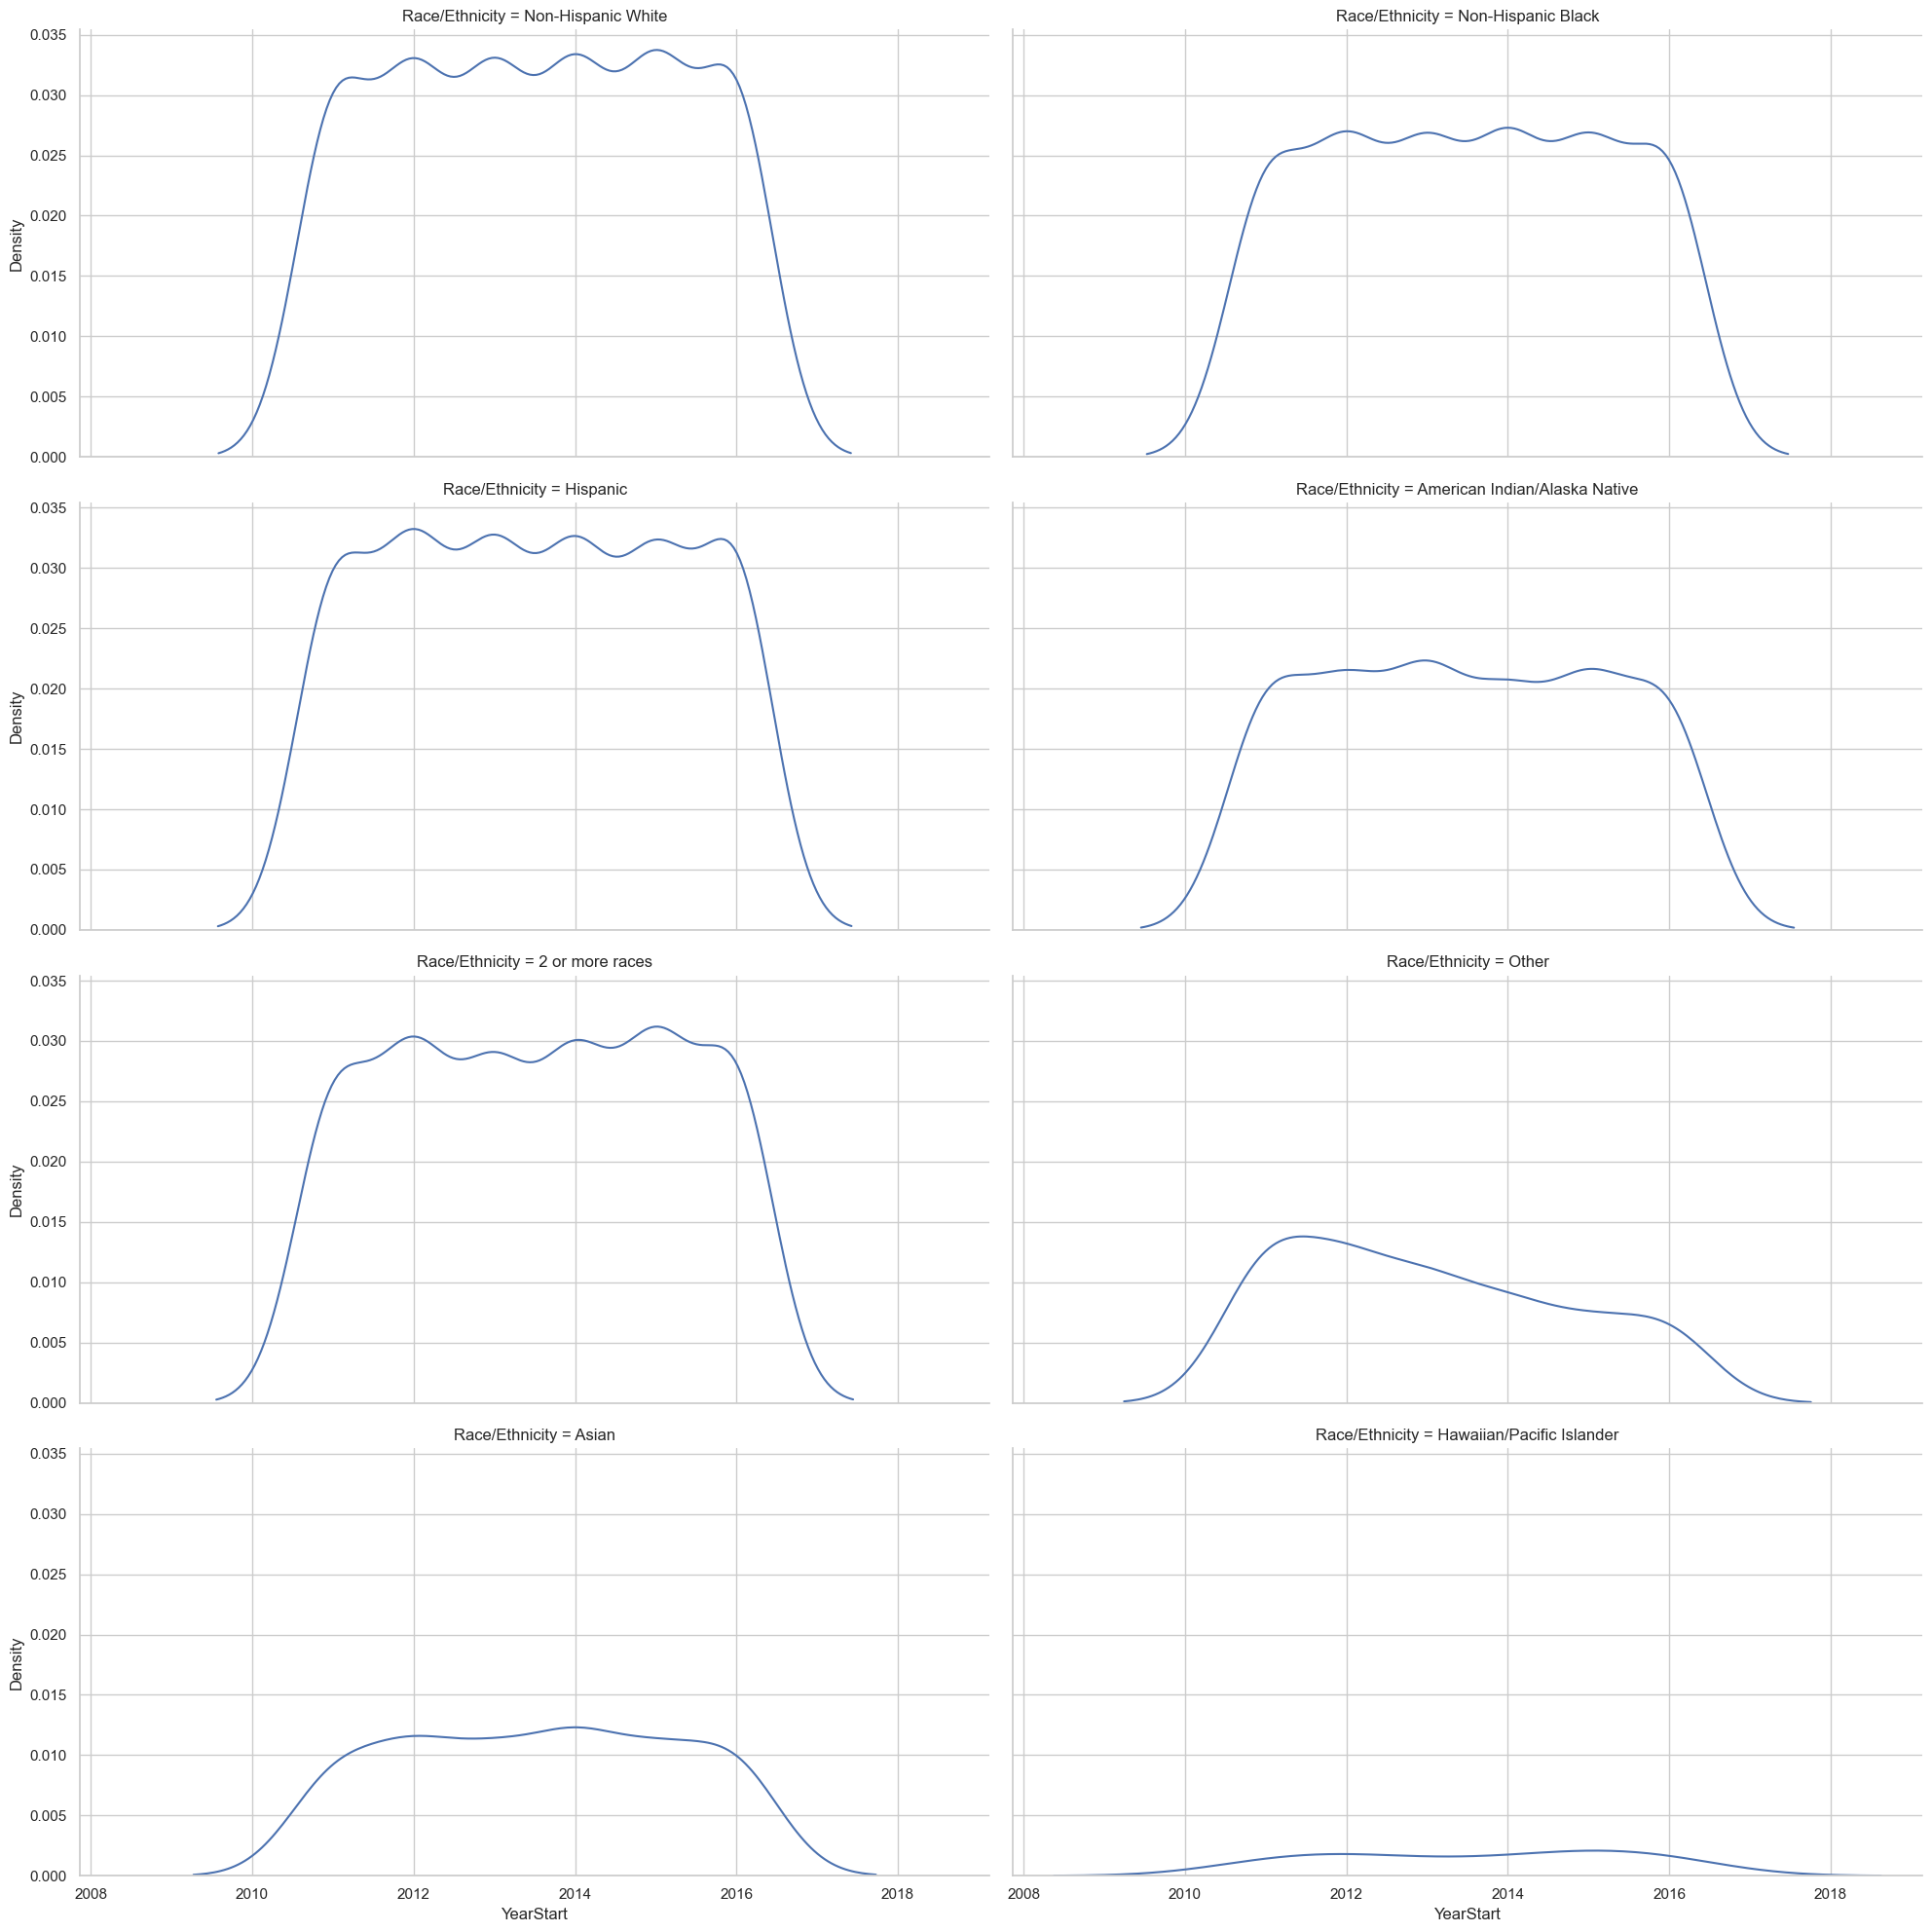

In [489]:
sns.displot(data=df,x='YearStart',kind='kde',col='Race/Ethnicity',aspect=2,col_wrap = 2)

## Observation: Almost all the race/ethinicity groups have similar distribution around the timeframe but Asian and Hawaiian/Pacific Islander standout one of the reasons can be most of there rows are empty due to unexplanatory reasons

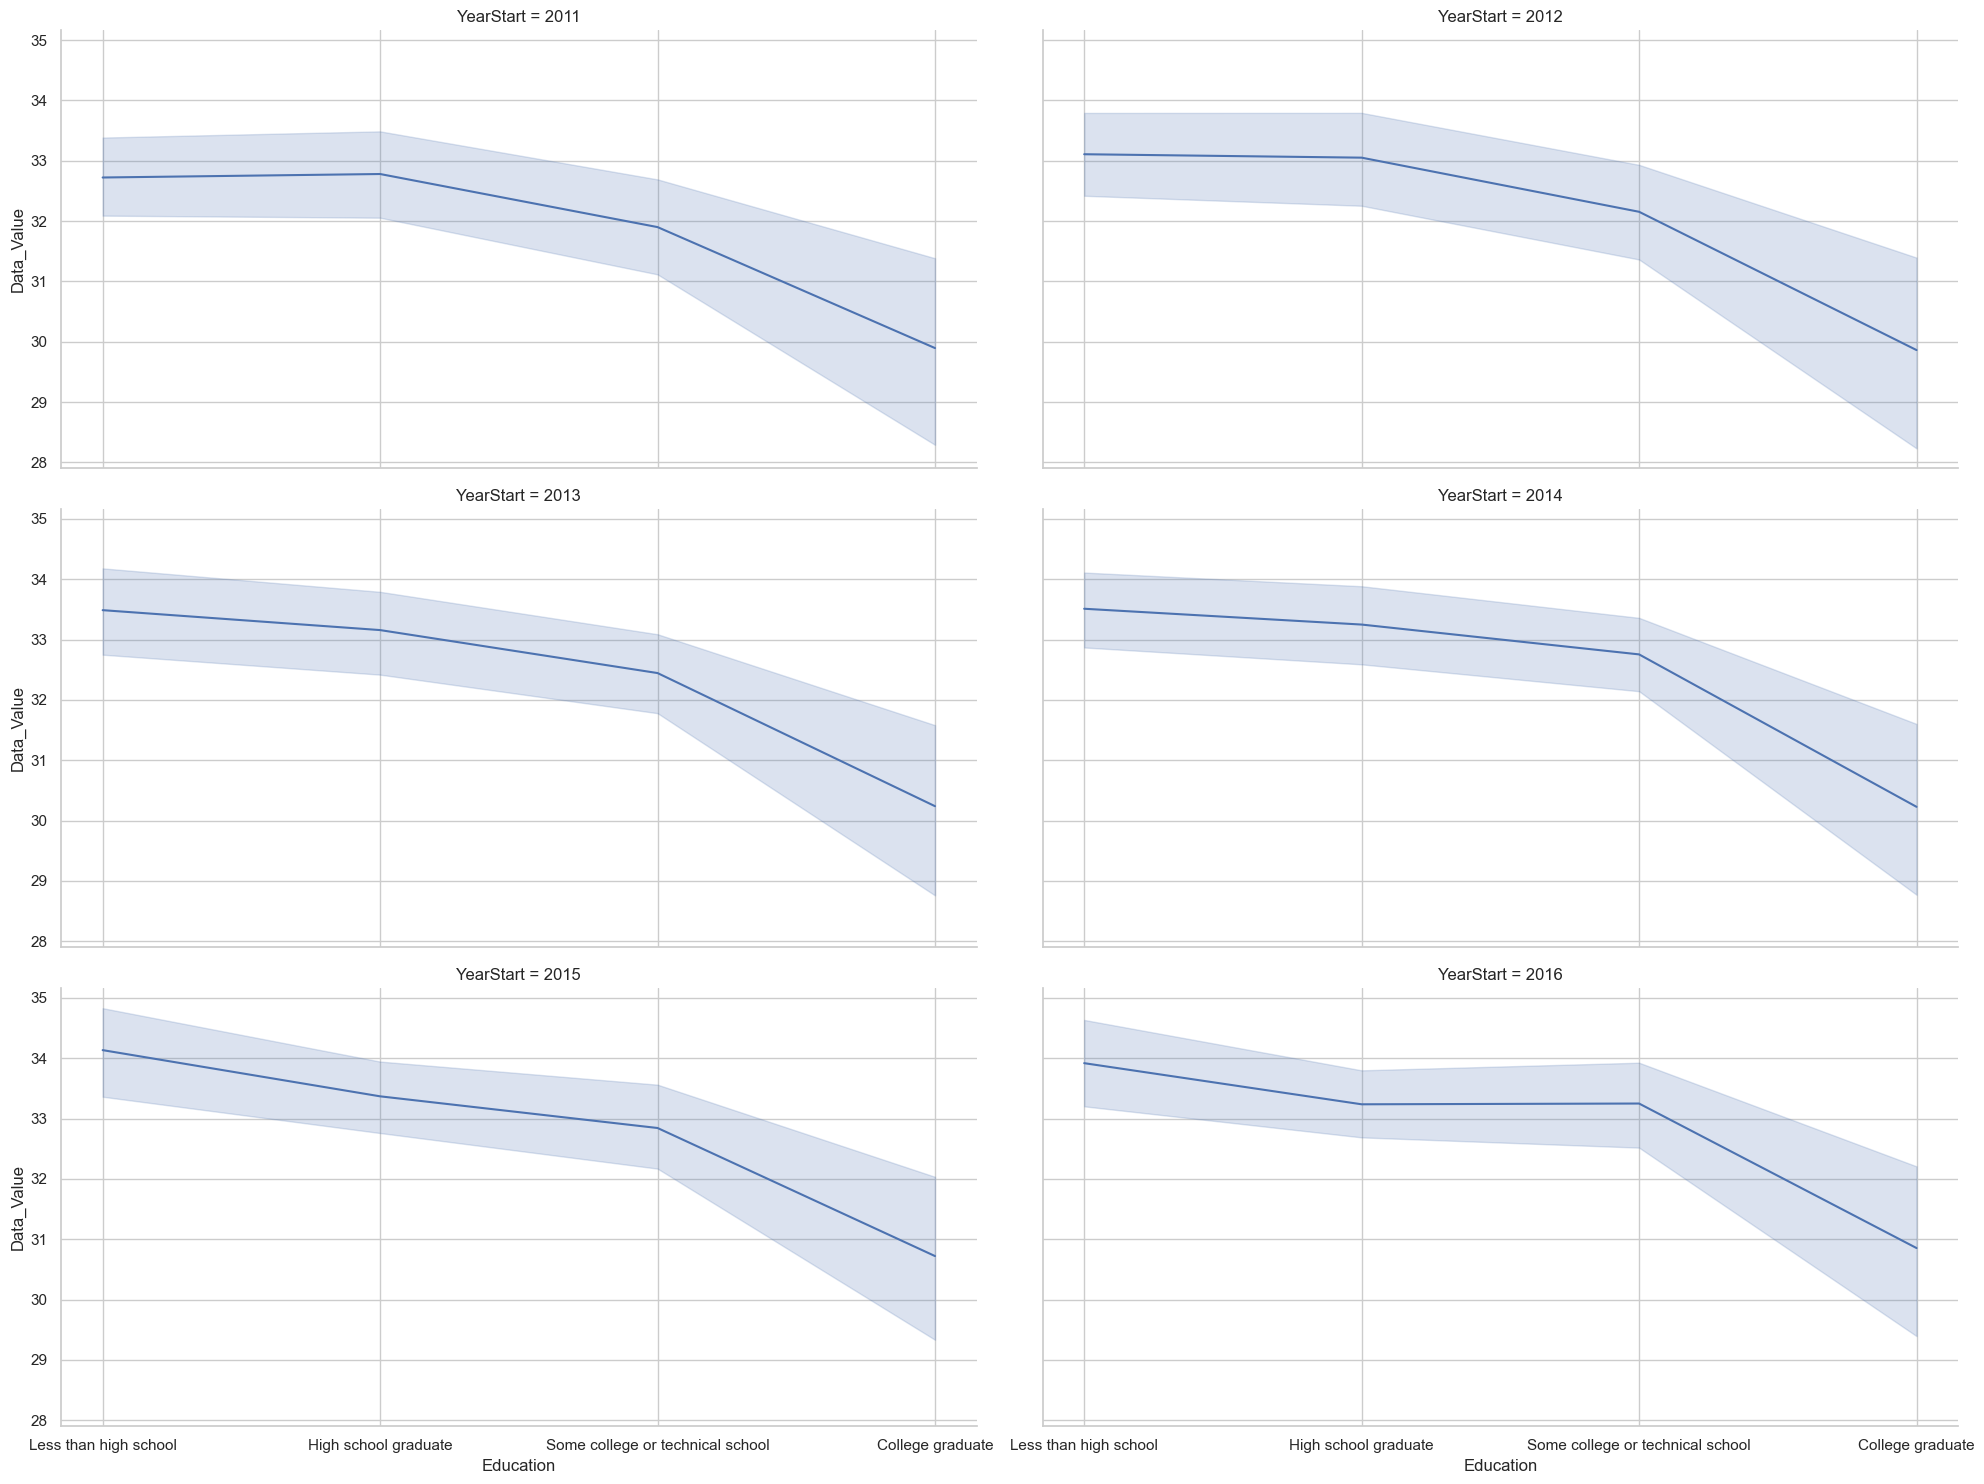

In [490]:
sns.relplot(data=df, x='Education', y='Data_Value', kind='line', col='YearStart',aspect = 2,col_wrap = 2)

<Axes: xlabel='YearStart', ylabel='Data_Value'>

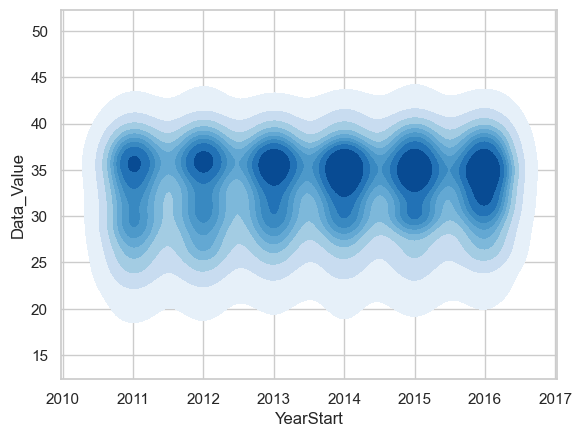

In [491]:
sns.kdeplot(data=df, x = 'YearStart', y = 'Data_Value', fill =True, cmap='Blues')

## In the later years the density around 35-40 of the Data_Value has increaased which suggests that more data is collected in that year with respect to 2011 but also the obesity levels have significantly increased during this period of five years.

## This is just a visualization of which part of the United States have been affected with obesity.

In [492]:
import plotly.express as px
sorted_df=df[df['YearStart']==2014]
fig = px.choropleth(sorted_df,
                    locations='LocationAbbr', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Data_Value',
                    color_continuous_scale="Viridis_r",
                    )
fig.update_layout(
      title_text = '2014 Obesity/Overweight by State',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )
fig.show()

**Feature Engineering:**

Our main target is to handle Age(years), Gender, Income, Education, Race/Ethnicity. We can use label encoder on some of these values but the problem arises when we have to handle missing values. The dataset is presented in such way that Nan of one column translates that information about the stratification is stored somewhere else. There is no direct way to deal with this but to use One-hot encoding. In the case of "LocationAbbr" it is not very trivial to use One-hot encoding as the above 5 columns will create 12 new columns but LocationAbbr has more than 50 unique values, using one-hot encoding on this field may inflate the data. After a very well assessment of this threat or Curse of dimensionality, we still choose to one-hot encode the locationabbr and Year columns as well. The reason behind this is using algorithms like Stochaistic Gradient Regressor, in SGDRegressor it becomes important that all the features are in the same range so instead of standardising the values we decided to go with one-hot encoding. It will take relatively more computational power but as the number of rows are less it will not increase the training time by a lot.

Although we are choosing one main dataframe, the individual models trained with some changes in the dataframe, you can go to individual collaboraator's folder and will find the model with there version of dataframe, in the main file we are keeping one dataframe to judge the accuracy of different models.

In [493]:
df_ohe = pd.get_dummies(data=df ,columns=['YearStart','LocationAbbr','Total','Age(years)','Education','Gender','Income','Race/Ethnicity'], drop_first=True)

In [494]:
df_ohe.head()

,LocationDesc,Data_Value,Sample_Size,GeoLocation,YearStart_2012,YearStart_2013,YearStart_2014,YearStart_2015,YearStart_2016,LocationAbbr_AL,...,"Income_$75,000 or greater",Income_Data not reported,"Income_Less than $15,000",Race/Ethnicity_American Indian/Alaska Native,Race/Ethnicity_Asian,Race/Ethnicity_Hawaiian/Pacific Islander,Race/Ethnicity_Hispanic,Race/Ethnicity_Non-Hispanic Black,Race/Ethnicity_Non-Hispanic White,Race/Ethnicity_Other
0,Alabama,32.0,7304.0,"(32.84057112200048, -86.63186076199969)",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Alabama,32.3,2581.0,"(32.84057112200048, -86.63186076199969)",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Alabama,31.8,4723.0,"(32.84057112200048, -86.63186076199969)",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Alabama,33.6,1153.0,"(32.84057112200048, -86.63186076199969)",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Alabama,32.8,2402.0,"(32.84057112200048, -86.63186076199969)",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [495]:
df_ohe.shape

(15814, 85)

In [496]:
df_ohe.drop(['Sample_Size','LocationDesc','GeoLocation'], axis=1, inplace=True)

### Before we actually start training models, there are some Statiscal Inferences calculated on the basis of Bayes' Theorem while assuming that as the sample size is large there is no skewness in data, and that is intuition is shown on the first few rows of the given dataset

In [497]:
small_df = df.iloc[0:25]
small_df['Total_Obese'] = np.ceil((df['Sample_Size']*df['Data_Value'])/100)
small_df

/var/folders/_8/xfc42_6120n2mkkw2ymrm37r0000gn/T/ipykernel_86483/2676245.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,YearStart,LocationAbbr,LocationDesc,Data_Value,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,Total_Obese
0,2011,AL,Alabama,32.0,7304.0,Total,NaN,NaN,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",2338.0
1,2011,AL,Alabama,32.3,2581.0,NaN,NaN,NaN,Male,NaN,NaN,"(32.84057112200048, -86.63186076199969)",834.0
2,2011,AL,Alabama,31.8,4723.0,NaN,NaN,NaN,Female,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1502.0
3,2011,AL,Alabama,33.6,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",388.0
4,2011,AL,Alabama,32.8,2402.0,NaN,NaN,High school graduate,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",788.0
5,2011,AL,Alabama,33.8,1925.0,NaN,NaN,Some college or technical school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",651.0
6,2011,AL,Alabama,26.4,1812.0,NaN,NaN,College graduate,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",479.0
7,2011,AL,Alabama,16.3,356.0,NaN,18 - 24,NaN,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",59.0
8,2011,AL,Alabama,35.2,598.0,NaN,25 - 34,NaN,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",211.0
9,2011,AL,Alabama,35.5,865.0,NaN,35 - 44,NaN,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",308.0


In [498]:
from itertools import product

gender = small_df.Gender.unique()[1:]
education = small_df.Education.unique()[1:]
age = small_df['Age(years)'].unique()[1:]
income = small_df.Income.unique()[1:]
race = small_df['Race/Ethnicity'].unique()[1:]


In [499]:
combinations = list((product(gender, education, age, income, race)))
total_obese = small_df.loc[df['Total'] == 'Total']['Total_Obese'].values[0]
total_sample = small_df.loc[df['Total'] == 'Total']['Sample_Size'].values[0]
comb_obese = pd.DataFrame(columns=['Combinations', 'Probability'])
for i in combinations:
    gender_total = small_df.loc[small_df['Gender'] == i[0]]['Total_Obese'].values[0]
    education_total = small_df.loc[small_df['Education'] == i[1]]['Total_Obese'].values[0]
    age_total = small_df.loc[small_df['Age(years)'] == i[2]]['Total_Obese'].values[0]
    income_total = small_df.loc[small_df['Income'] == i[3]]['Total_Obese'].values[0]
    ethnicity_total = small_df.loc[small_df['Race/Ethnicity'] == i[4]]['Total_Obese'].values[0]
    gender_education = gender_total*education_total/total_obese
    add_age = gender_education*age_total/total_obese
    add_income = add_age*income_total/total_obese
    probability = (add_income*ethnicity_total/total_obese)/total_sample
    comb_obese.loc[len(comb_obese.index)] = [i, probability]   

## Combinations with highest probability of being obese according to statistical approach

In [500]:
comb_obese.sort_values(by=['Probability'], ascending=False)

,Combinations,Probability
1230,"(Female, High school graduate, 65 or older, $1...",2.653868e-03
1225,"(Female, High school graduate, 65 or older, Le...",2.391827e-03
1195,"(Female, High school graduate, 55 - 64, $15,00...",2.370634e-03
1440,"(Female, Some college or technical school, 65 ...",2.192473e-03
1190,"(Female, High school graduate, 55 - 64, Less t...",2.136559e-03
...,...,...
29,"(Male, Less than high school, 18 - 24, $75,000...",4.818423e-07
34,"(Male, Less than high school, 18 - 24, Data no...",4.595348e-07
19,"(Male, Less than high school, 18 - 24, $35,000...",4.149198e-07
14,"(Male, Less than high school, 18 - 24, $25,000...",4.045096e-07


In [501]:
X = df_ohe.drop(['Data_Value'],axis=1)
y = df_ohe[['Data_Value']]

In [502]:
from sklearn import metrics
from sklearn.linear_model import Ridge, LinearRegression, SGDRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
import xgboost as xbg

### Please refer this table, each of the models have been expermiented with different values in the respective folders which contains individual work

| No. | Name           |                       Model |
|-----|----------------|----------------------------:|
| 1   | Rohit Rathod   |           Linear Regression |
| 2   | Harshneel Soni |            Ridge Regression |
| 3   | Nishit Munjani | Stochastic Gradient Descent |
| 4   | Bhavan Bhatt   |     Random Forest Regressor |
| 5   | Pratham Patel  |           Xgboost Regressor |

## 1. Linear Regression

In [503]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [504]:
y_pred = reg.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 4.2592011980489906
MSE: 27.356897491941698
RMSE: 5.230382155439667
R2: 0.16809894618082522


## 2. Ridge Regression

In [505]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
alphas = [0.001, 0.01, 0.1, 1.0, 10.0,3.0]
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(Ridge(), param_grid, cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 3.0]})

In [506]:
best_alpha = grid_search.best_params_
best_alpha

{'alpha': 3.0}

In [507]:
y_pred = grid_search.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 4.258815319404425
MSE: 27.356919150714074
RMSE: 5.230384225916302
R2: 0.16809828755513245


## 3. Stochastic Gradient Descent Regressor

In [508]:
y = y.values.flatten()
X_train3, X_test3 ,y_train3 ,y_test3 = train_test_split(X, y, test_size = 0.3, random_state = 42)
param_grid = {
    'alpha': [0.0003, 0.001, 0.01, 0.1, 1.0],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'max_iter': [1000, 2000, 3000],
}
reg3 = SGDRegressor()
grid_search3 = GridSearchCV(reg3, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search3.fit(X_train3, y_train3)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/bhavanbhatt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/bhavanbhatt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/bhavanbhatt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/bhavanbhatt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.wa

/Users/bhavanbhatt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/bhavanbhatt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/bhavanbhatt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/bhavanbhatt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.wa

GridSearchCV(cv=5, estimator=SGDRegressor(), n_jobs=-1,
             param_grid={'alpha': [0.0003, 0.001, 0.01, 0.1, 1.0],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'max_iter': [1000, 2000, 3000]},
             verbose=1)

In [509]:
best_params = grid_search3.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'alpha': 0.0003, 'learning_rate': 'adaptive', 'max_iter': 1000}


In [510]:
y_pred = grid_search3.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 4.258821281832616
MSE: 27.363506085132446
RMSE: 5.23101386780158
R2: 0.16789798422447533


## 4. Random Forest Regressor

In [407]:
n_estimators = [80,100,120,200]
# Maximum number of levels in tree
max_depth = [10,20,25]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5,6,7,8,9,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10,15]
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(rf,random_grid,cv=5, verbose=1, n_jobs=-1)
rf_random.fit(X_train,y_train.values.flatten())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 25],
                                        'min_samples_leaf': [1, 2, 5, 10, 15],
                                        'min_samples_split': [2, 5, 6, 7, 8, 9,
                                                              10],
                                        'n_estimators': [80, 100, 120, 200]},
                   verbose=1)

In [511]:
best_params = rf_random.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 15, 'max_depth': 25}


In [409]:
y_pred = rf_random.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 4.361112265794658
MSE: 28.829381232627913
RMSE: 5.369299882910985
R2: 0.12332191048190178


## 5. Xgboost

In [444]:
import xgboost as xgb
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [445]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [447]:
y_pred = regressor.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 4.34204647968642
MSE: 28.449846224839973
RMSE: 5.333839726204751
R2: 0.13486326209288246


## Model Evaluation: 
| No. |                       Model | MAE                | MSE                | R2                  |
|-----|----------------------------:|--------------------|--------------------|---------------------|
| 1   |           Linear Regression | 4.2592011980489906 | 27.356897491941698 | 0.16809894618082522 |
| 2   |            Ridge Regression | 4.258815319404425  | 27.356919150714074 | 0.16809828755513245 |
| 3   | Stochastic Gradient Descent | 4.258821281832616  | 27.363506085132446 | 0.16789798422447533 |
| 4   |     Random Forest Regressor | 4.361112265794658  | 28.829381232627913 | 0.12332191048190178 |
| 5   |           Xgboost Regressor | 4.34204647968642   | 28.449846224839973 | 0.13486326209288246 |

## Observations: MAE and MSE of almost all the models is very close to each other. As the model becomes more complex, it's testing error increases which can be due to overfitting of the model. Amongst the given models, Ridge Regression and SGDRegressor performs best and Random Forest performs worst.

## The Data is in the form of 0's and 1's which may increase the number of features but as it was expected Stochastic Gradient Descent works best on these kind of data, as the features are in the same range calculation of there coefficients is feasible.

## Random Forest has a lot of hyperparameters and we have only configured a few, it may happen that because of this the default values of other hyperparameters are causing this increase in error.

## Same applies for Xgboost but in Random Forest the hyperparameters are applied at every node while in xgboost, you only have to apply hyperparameter once and then the model will learn itself using the iterative approach.

## **References:**

- [https://chronicdata.cdc.gov/Nutrition-Physical-Activity-and-Obesity/Nutrition-Physical-Activity-and-Obesity-Behavioral/hn4x-zwk7](https://chronicdata.cdc.gov/Nutrition-Physical-Activity-and-Obesity/Nutrition-Physical-Activity-and-Obesity-Behavioral/hn4x-zwk7)
- [https://data.cdc.gov/Nutrition-Physical-Activity-and-Obesity/Percent-of-adults-aged-18-and-older-who-have-obesi/tv7q-8s5b](https://data.cdc.gov/Nutrition-Physical-Activity-and-Obesity/Percent-of-adults-aged-18-and-older-who-have-obesi/tv7q-8s5b)
- [https://towardsdatascience.com/confidence-intervals-explained-simply-for-data-scientists-8354a6e2266b](https://towardsdatascience.com/confidence-intervals-explained-simply-for-data-scientists-8354a6e2266b)
- [https://nccd.cdc.gov/GTSSDataSurveyResources/HelpHtml/glossary.htm](https://nccd.cdc.gov/GTSSDataSurveyResources/HelpHtml/glossary.htm)
- [https://towardsdatascience.com/simplest-way-of-creating-a-choropleth-map-by-u-s-states-in-python-f359ada7735e](https://towardsdatascience.com/simplest-way-of-creating-a-choropleth-map-by-u-s-states-in-python-f359ada7735e)
- [https://scikit-learn.org/stable/modules/generated/sklearn.linear\_model.SGDRegressor.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)


### Appendix A:
I will try to fit a simple linear regressor model containing the confidence interval and we can analyse the error

In [454]:
df = df.dropna(subset=['Sample_Size'])
df = df[df['Topic'] == 'Obesity / Weight Status']
final_dataset = df[['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc',
       'Class', 'Topic', 'Question','Data_Value','Low_Confidence_Limit','High_Confidence_Limit ','Sample_Size', 
       'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation']] 

final_dataset["Year"] = final_dataset["YearEnd"]
final_dataset = final_dataset[['Year', 'LocationAbbr', 'LocationDesc',
       'Class', 'Topic', 'Question','Data_Value','Sample_Size', 
       'Total', 'Age(years)', 'Education', 'Gender', 'Income','Low_Confidence_Limit','High_Confidence_Limit ',
       'Race/Ethnicity', 'GeoLocation']]
final_dataset.drop(['Class'],axis=1,inplace=True)
final_dataset1 = final_dataset.loc[final_dataset['Topic'] == 'Obesity / Weight Status']
final_dataset1.drop(['Topic','LocationDesc','Question','GeoLocation'],axis=1,inplace=True)
final_dataset1.shape

/var/folders/_8/xfc42_6120n2mkkw2ymrm37r0000gn/T/ipykernel_86483/4107807013.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(16254, 12)

In [455]:
data = pd.get_dummies(data=final_dataset1,columns=['Total','Age(years)','Education','Gender','Income','Race/Ethnicity'])
X = data[['Year','Age(years)_25 - 34','Low_Confidence_Limit','High_Confidence_Limit ','Age(years)_35 - 44', 'Age(years)_45 - 54',
       'Age(years)_55 - 64', 'Age(years)_65 or older',
       'Education_High school graduate', 'Education_Less than high school',
       'Education_Some college or technical school', 'Gender_Male',
       'Income_$25,000 - $34,999', 'Income_$35,000 - $49,999',
       'Income_$50,000 - $74,999', 'Income_$75,000 or greater',
       'Income_Data not reported', 'Income_Less than $15,000',
       'Race/Ethnicity_American Indian/Alaska Native', 'Race/Ethnicity_Asian',
       'Race/Ethnicity_Hawaiian/Pacific Islander', 'Race/Ethnicity_Hispanic',
       'Race/Ethnicity_Non-Hispanic Black',
       'Race/Ethnicity_Non-Hispanic White', 'Race/Ethnicity_Other']]
y = data[['Data_Value']]

In [456]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [458]:
predictions=reg.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', metrics.r2_score(y_test, predictions))

MAE: 0.15309065251249981
MSE: 0.0807373532783273
RMSE: 0.28414319150443723
R2: 0.9981539707113491


### The reason behind this low error is already mentioned above, as Confidence Limit Interval is a part of inferential statistics it should not be passed on as input feature other wise data leak will happen.